In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [25]:
iphones_df = pd.read_csv('../notebooks/continued_scraping_ebay.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../notebooks/continued_scraping_ebay.csv'

In [3]:
iphones_df

,Unnamed: 0,title,price,num_sold,shipping_type,condition,condition_description,num_reviews,pos_feedback_pct,return_days
0,0,apple iphone 6s (excellent condition) factory ...,135.99,NaN,free 3 day shipping,used,“fully functional in excellent condition. our ...,30474.0,99.9,30 days returns
1,1,apple iphone 8 64gb gsm factory unlocked smart...,149.99,"2,459 sold",NaN,used,“overall good condition will have marks and sc...,13110.0,96.2,30 days returns
2,2,apple iphone 8 plus 256gb unlocked straight ta...,259.00,NaN,NaN,excellent - refurbished,““pick your carrier or pick fully unlocked to ...,61033.0,100.0,30 days returns
3,3,apple iphone 7 32gb gsm factory unlocked 4g lt...,107.99,"6,012 sold",NaN,used,“overall good working condition and will have ...,13110.0,96.2,30 days returns
4,4,apple iphone x 64gb factory unlocked phone - v...,209.95,"22,380 sold",free 3 day shipping,very good - refurbished,"“this is a b+ stock item, meaning unit is in v...",332402.0,98.4,60 days returns
...,...,...,...,...,...,...,...,...,...,...
8498,8498,apple iphone 7 - 128gb - black - factory unloc...,149.99,NaN,NaN,used,“this device powers on and is 100% functional ...,4258.0,99.8,30 days returns
8499,8499,apple iphone 6s - 64gb - space gray (t-mobile)...,90.99,NaN,NaN,used,NaN,134.0,100.0,Seller does not accept returns
8500,8500,⭐️⭐️⭐️⭐️⭐️ **as is** apple iphone 4 unknown im...,9.43,NaN,NaN,for parts or not working,“this phone is being sold as is for parts or n...,15182.0,99.9,30 days returns
8501,8501,"apple iphone xs, a1920 256gb silver unlocked v...",279.97,NaN,NaN,very good - refurbished,NaN,191.0,98.5,30 days returns


In [4]:
iphones_df['model'] = iphones_df['title'].str.extract(r'iphone ([^ \-+/,p]*)')
iphones_df['capacity'] = iphones_df['title'].str.extract(r' (\d+)[ ]?gb+.*$').dropna().astype(int)

In [5]:
iphones_df

,Unnamed: 0,title,price,num_sold,shipping_type,condition,condition_description,num_reviews,pos_feedback_pct,return_days,model,capacity
0,0,apple iphone 6s (excellent condition) factory ...,135.99,NaN,free 3 day shipping,used,“fully functional in excellent condition. our ...,30474.0,99.9,30 days returns,6s,NaN
1,1,apple iphone 8 64gb gsm factory unlocked smart...,149.99,"2,459 sold",NaN,used,“overall good condition will have marks and sc...,13110.0,96.2,30 days returns,8,64.0
2,2,apple iphone 8 plus 256gb unlocked straight ta...,259.00,NaN,NaN,excellent - refurbished,““pick your carrier or pick fully unlocked to ...,61033.0,100.0,30 days returns,8,256.0
3,3,apple iphone 7 32gb gsm factory unlocked 4g lt...,107.99,"6,012 sold",NaN,used,“overall good working condition and will have ...,13110.0,96.2,30 days returns,7,32.0
4,4,apple iphone x 64gb factory unlocked phone - v...,209.95,"22,380 sold",free 3 day shipping,very good - refurbished,"“this is a b+ stock item, meaning unit is in v...",332402.0,98.4,60 days returns,x,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8498,8498,apple iphone 7 - 128gb - black - factory unloc...,149.99,NaN,NaN,used,“this device powers on and is 100% functional ...,4258.0,99.8,30 days returns,7,128.0
8499,8499,apple iphone 6s - 64gb - space gray (t-mobile)...,90.99,NaN,NaN,used,NaN,134.0,100.0,Seller does not accept returns,6s,64.0
8500,8500,⭐️⭐️⭐️⭐️⭐️ **as is** apple iphone 4 unknown im...,9.43,NaN,NaN,for parts or not working,“this phone is being sold as is for parts or n...,15182.0,99.9,30 days returns,4,NaN
8501,8501,"apple iphone xs, a1920 256gb silver unlocked v...",279.97,NaN,NaN,very good - refurbished,NaN,191.0,98.5,30 days returns,xs,256.0


In [6]:
# View average capacity for each model
iphones_df.groupby('model').mean()

,Unnamed: 0,price,num_reviews,pos_feedback_pct,capacity
model,,,,,
,5128.548387,25.461319,1152.741935,98.421505,64.000000
(1),4617.000000,27.990000,507.000000,100.000000,NaN
(defective),7748.000000,80.000000,130.000000,100.000000,NaN
10,366.500000,9.470000,1112.000000,91.400000,NaN
11,3366.247629,308.691509,116660.397012,98.515121,127.098592
...,...,...,...,...,...
with,5277.000000,35.990000,1743.000000,99.000000,NaN
x,3539.336364,182.431810,78735.566667,98.334969,130.451064
xr,3842.895035,204.136061,78352.149780,98.690105,86.915751


In [7]:
# Fill NaNs in capacity with mean capacity for each model
iphones_df['capacity'] = iphones_df['capacity'].fillna(iphones_df.groupby('model')['capacity'].transform('mean'))

In [8]:
iphones_df.isna().sum()

Unnamed: 0                  0
title                      16
price                     241
num_sold                 7492
shipping_type            7409
condition                  16
condition_description    4119
num_reviews                99
pos_feedback_pct          301
return_days                17
model                      69
capacity                  222
dtype: int64

In [9]:
iphones_df['return_days'].value_counts()

30 days returns                   4706
Seller does not accept returns    1924
60 days returns                   1796
14 days returns                     60
Name: return_days, dtype: int64

In [10]:
return_dict = {
    'Seller does not accept returns': 0,
    '14 days returns': 1,
    '30 days returns': 2,
    '60 days returns': 3
}

iphones_df['return_days'] = iphones_df['return_days'].map(return_dict)

In [11]:
iphones_df['condition'].value_counts()

used                        3473
new                         2207
for parts or not working    1142
good - refurbished           475
very good - refurbished      460
open box                     423
excellent - refurbished      307
Name: condition, dtype: int64

In [12]:
condition_dict = {
    'for parts or not working': 0,
    'used': 1,
    'good - refurbished': 2,
    'very good - refurbished': 3,
    'excellent - refurbished': 4,
    'open box': 5,
    'new': 6
}
iphones_df['condition'] = iphones_df['condition'].map(condition_dict)

In [13]:
release_years = {
    '2g':2008,
    '3g': 2009,
    '4g': 2010,
    '4s': 2011,
    '5': 2012,
    '5c': 2013,
    '5s': 2013,
    '6': 2014, 
    '6s': 2015,
    'se': 2016,
    '7': 2016,
    '8': 2017, 
    'x': 2017,
    'xr': 2018,
    'xs': 2018,
    '11': 2019,
    '12': 2020,
    '13': 2021
}
# Filter for iphone models only, get rid of lots and non-iphones
iphones_df = iphones_df[iphones_df['model'].isin(release_years)]

iphones_df['release_year'] = iphones_df['model'].apply(lambda x: release_years[x])


/var/folders/q_/g2zssbt10h1blxnpvcp374lw0000gn/T/ipykernel_89239/146278888.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphones_df['release_year'] = iphones_df['model'].apply(lambda x: release_years[x])


In [14]:
models_dict = {
    '2g':0,
    '3g': 1,
    '4g': 2,
    '4s': 3,
    '5': 4,
    '5c': 5,
    '5s': 6,
    '6': 7, 
    '6s': 8,
    'se': 9,
    '7': 10,
    '8': 11, 
    'x': 12,
    'xr': 13,
    'xs': 14,
    '11': 15,
    '12': 16,
    '13': 17
    }
iphones_df['model'] = iphones_df['model'].map(models_dict)

/var/folders/q_/g2zssbt10h1blxnpvcp374lw0000gn/T/ipykernel_89239/3837953388.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphones_df['model'] = iphones_df['model'].map(models_dict)


In [15]:
iphones_df['release_year'].value_counts()

2016    1433
2017    1379
2018    1296
2019     949
2014     849
2015     744
2021     514
2020     370
2013     281
2012     143
2011      90
2009       1
Name: release_year, dtype: int64

In [16]:
iphones_df.describe()

,Unnamed: 0,price,condition,num_reviews,pos_feedback_pct,return_days,model,capacity,release_year
count,8049.000000,7828.000000,8049.000000,7.966000e+03,7771.000000,8048.000000,8049.000000,8048.000000,8049.000000
mean,4202.680830,193.820466,2.586657,7.384094e+04,98.653056,1.758449,11.197664,95.652344,2016.814263
std,2459.295801,190.908298,2.277030,3.802376e+05,2.041846,1.030082,3.427438,81.999222,2.223623
min,0.000000,1.000000,0.000000,0.000000e+00,50.000000,0.000000,1.000000,2.000000,2009.000000
25%,2054.000000,43.920000,1.000000,4.870000e+02,98.200000,2.000000,8.000000,57.492355,2015.000000
50%,4196.000000,144.990000,1.000000,2.038000e+03,99.400000,2.000000,11.000000,64.000000,2017.000000
75%,6334.000000,269.990000,5.000000,2.763700e+04,100.000000,2.000000,14.000000,128.000000,2018.000000
max,8502.000000,999.990000,6.000000,3.101878e+06,100.000000,3.000000,17.000000,512.000000,2021.000000


In [17]:
iphones_df = iphones_df.drop(columns=['num_sold', 'shipping_type', 'Unnamed: 0'])

In [18]:
iphones_df.isna().sum()

title                       0
price                     221
condition                   0
condition_description    3771
num_reviews                83
pos_feedback_pct          278
return_days                 1
model                       0
capacity                    1
release_year                0
dtype: int64

In [19]:
iphones_df.isna().sum()

title                       0
price                     221
condition                   0
condition_description    3771
num_reviews                83
pos_feedback_pct          278
return_days                 1
model                       0
capacity                    1
release_year                0
dtype: int64

In [20]:
iphones_df['return_days'].value_counts()

2.0    4461
0.0    1807
3.0    1725
1.0      55
Name: return_days, dtype: int64

iphones_df.drop(columns = )

In [21]:
numeric_iphones_cleaned = iphones_df.drop(columns = ['condition_description']).dropna()

In [22]:
nlp_iphones_cleaned = iphones_df.dropna()

In [23]:
nlp_iphones_cleaned

,title,price,condition,condition_description,num_reviews,pos_feedback_pct,return_days,model,capacity,release_year
0,apple iphone 6s (excellent condition) factory ...,135.99,1.0,“fully functional in excellent condition. our ...,30474.0,99.9,2.0,8,57.492355,2015
1,apple iphone 8 64gb gsm factory unlocked smart...,149.99,1.0,“overall good condition will have marks and sc...,13110.0,96.2,2.0,11,64.000000,2017
2,apple iphone 8 plus 256gb unlocked straight ta...,259.00,4.0,““pick your carrier or pick fully unlocked to ...,61033.0,100.0,2.0,11,256.000000,2017
3,apple iphone 7 32gb gsm factory unlocked 4g lt...,107.99,1.0,“overall good working condition and will have ...,13110.0,96.2,2.0,10,32.000000,2016
4,apple iphone x 64gb factory unlocked phone - v...,209.95,3.0,"“this is a b+ stock item, meaning unit is in v...",332402.0,98.4,3.0,12,64.000000,2017
...,...,...,...,...,...,...,...,...,...,...
8491,apple iphone 11 pro 64gb silver verizon unlock...,456.99,3.0,“device is 100% fully functional and in very g...,54837.0,99.4,3.0,15,64.000000,2019
8492,iphone 11 xfinity 128gb white | near mint,335.00,1.0,“near mint condition: screen is 100% flawless....,22050.0,99.6,3.0,15,128.000000,2019
8495,apple iphone 11 pro max 512gb black - unlocked...,591.00,1.0,“this is a used device with real photos of the...,80257.0,99.7,2.0,15,512.000000,2019
8498,apple iphone 7 - 128gb - black - factory unloc...,149.99,1.0,“this device powers on and is 100% functional ...,4258.0,99.8,2.0,10,128.000000,2016


In [17]:
# numeric_iphones_cleaned.to_csv('numeric_iphones_cleaned.csv')
nlp_iphones_cleaned.to_csv('nlp_iphones_cleaned.csv')

In [21]:
iphones_df.isna().sum()

Unnamed: 0                  0
title                       0
price                     221
num_sold                 7055
shipping_type            6970
condition                   0
condition_description    3771
num_reviews                83
pos_feedback_pct          278
return_days                 1
model                       0
capacity                    1
release_year                0
dtype: int64

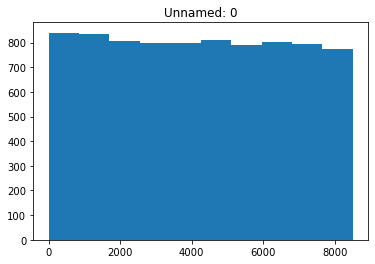

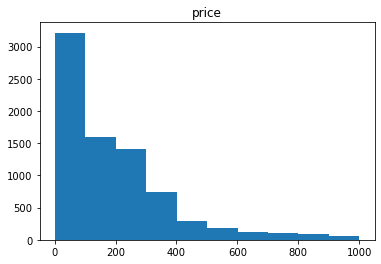

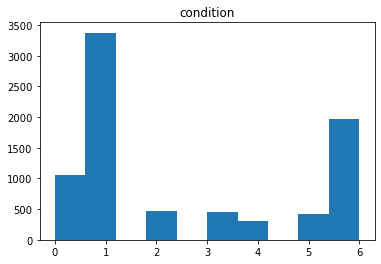

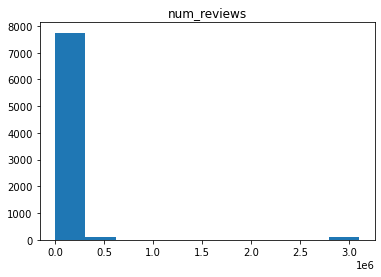

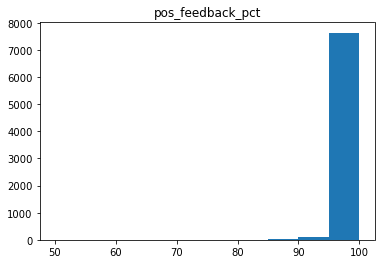

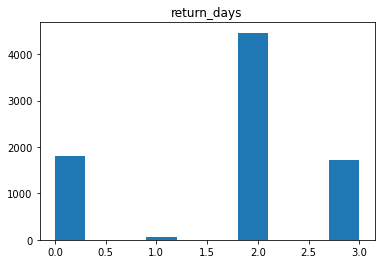

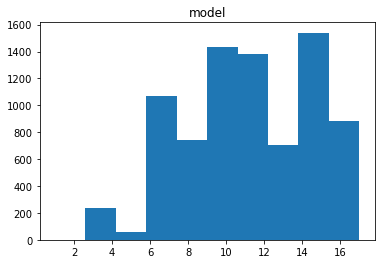

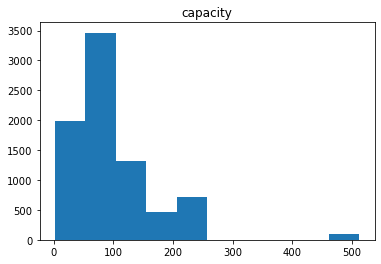

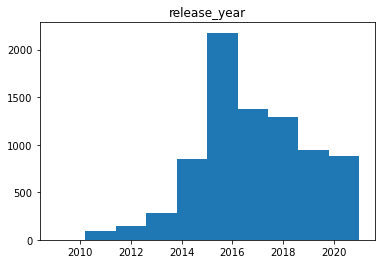

In [19]:
for col in iphones_df.describe().columns:
    plt.hist(iphones_df[col])
    plt.title(col)
    plt.show()
    

In [20]:
iphones_df.describe(include='all')

,Unnamed: 0,title,price,num_sold,shipping_type,condition,condition_description,num_reviews,pos_feedback_pct,return_days,model,capacity,release_year
count,8049.000000,8049,7828.000000,994,1079,8049.000000,4278,7.966000e+03,7771.000000,8048.000000,8049.000000,8048.000000,8049.000000
unique,NaN,6348,NaN,461,2,NaN,2090,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,"for iphone 8 plus case, iphone 7 plus case hyb...",NaN,44 sold,free 3 day shipping,NaN,"“note: phone has had basic testing done, see t...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,20,NaN,15,1061,NaN,95,NaN,NaN,NaN,NaN,NaN,NaN
mean,4202.680830,NaN,193.820466,NaN,NaN,2.586657,NaN,7.384094e+04,98.653056,1.758449,11.197664,95.652344,2016.814263
std,2459.295801,NaN,190.908298,NaN,NaN,2.277030,NaN,3.802376e+05,2.041846,1.030082,3.427438,81.999222,2.223623
min,0.000000,NaN,1.000000,NaN,NaN,0.000000,NaN,0.000000e+00,50.000000,0.000000,1.000000,2.000000,2009.000000
25%,2054.000000,NaN,43.920000,NaN,NaN,1.000000,NaN,4.870000e+02,98.200000,2.000000,8.000000,57.492355,2015.000000
50%,4196.000000,NaN,144.990000,NaN,NaN,1.000000,NaN,2.038000e+03,99.400000,2.000000,11.000000,64.000000,2017.000000
75%,6334.000000,NaN,269.990000,NaN,NaN,5.000000,NaN,2.763700e+04,100.000000,2.000000,14.000000,128.000000,2018.000000
